### **QUESTION NUMBER 1**

In [135]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,homogeneity_score,completeness_score

In [2]:
df = pd.read_csv('/content/parkinsons.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
print("SHAPE OF THE DATASET",df.shape)
print("Checking whether null values are there or not")
df.isnull().sum()


SHAPE OF THE DATASET (195, 24)
Checking whether null values are there or not


name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
x = df.drop(columns=['name', 'status'], axis=1)
y = df['status']

In [7]:
print(x)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [8]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)



In [11]:
scaler = StandardScaler()
scaler.fit(x_train)
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)



In [30]:
def cm_display(actual,predicted):
  confusion_matrix = metrics.confusion_matrix(actual, predicted)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
  cm_display.plot()
  plt.show()

In [133]:
def roc_curves(actual,predicted):
  fpr, tpr, threshold = metrics.roc_curve(actual,predicted)
  roc_auc = metrics.auc(fpr, tpr)

  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

### **USING LOGISTIC REGRESSION**

In [45]:
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [46]:
lr_y_pred = lr_model.predict(X_test)

The accuracy of logistic regression model is  0.8205128205128205


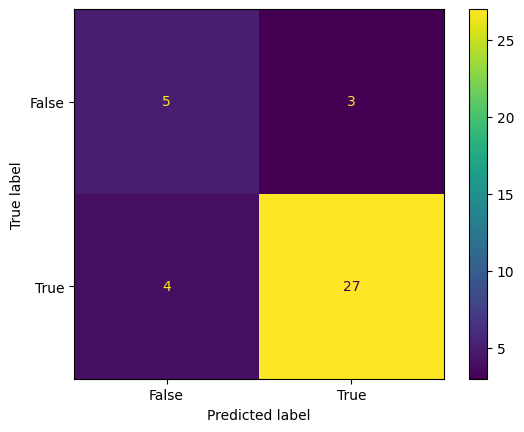

In [100]:
print("The accuracy of logistic regression model is ",accuracy_score(y_test, lr_y_pred))
cm_display(y_test,lr_y_pred)



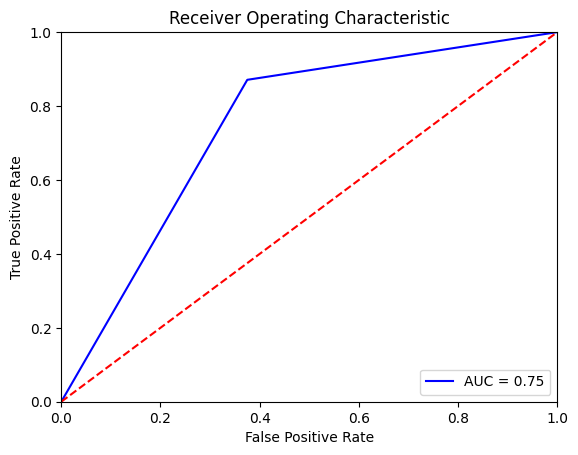

In [109]:
roc_curves(y_test,lr_y_pred)

# **USING SUPPORT VECTOR MACHINES**

In [14]:
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train,y_train)

SVC(kernel='linear')

In [33]:
svm_y_pred = svm_model.predict(X_test)


The accuracy of the svm model is  0.8717948717948718


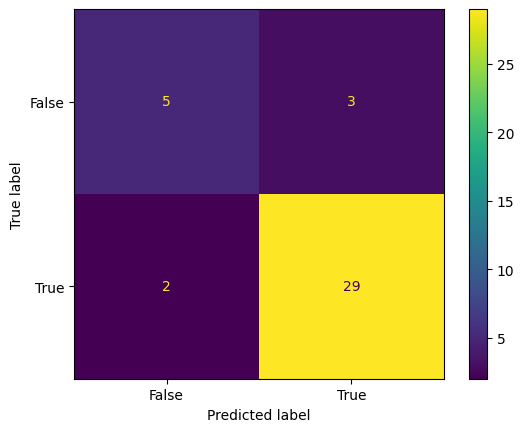

In [101]:
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("The accuracy of the svm model is ",svm_accuracy)
cm_display(y_test,svm_y_pred)


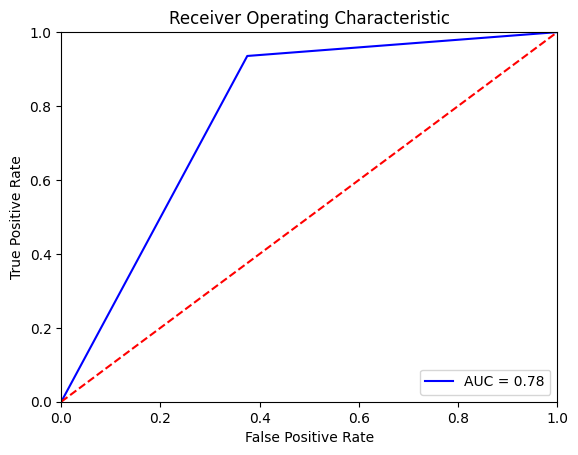

In [110]:
roc_curves(y_test,svm_y_pred)

### **K NEAREST NEIGHBORS **

In [128]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [129]:
knn_y_pred = knn_classifier.predict(X_test)

The accuracy of the knn model is  0.8205128205128205


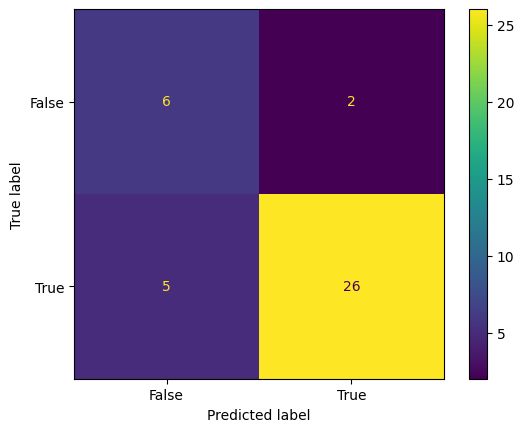

In [130]:
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print("The accuracy of the knn model is ",knn_accuracy)
cm_display(y_test,knn_y_pred)


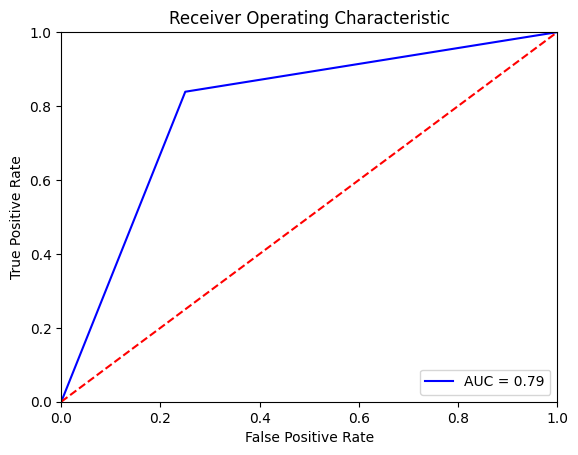

In [131]:
roc_curves(y_test,knn_y_pred)

### NAIVE **BAYES**

In [48]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [49]:
nb_y_pred = nb_model.predict(X_test)

The accuracy of the naive bayes model is  0.6153846153846154


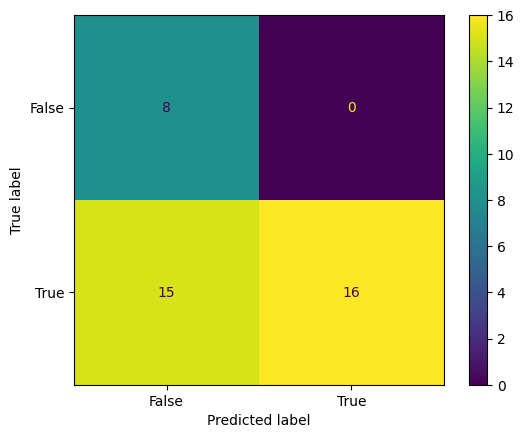

In [105]:
nb_accuracy = accuracy_score(y_test, nb_y_pred)
print("The accuracy of the naive bayes model is ",nb_accuracy)
cm_display(y_test,nb_y_pred)


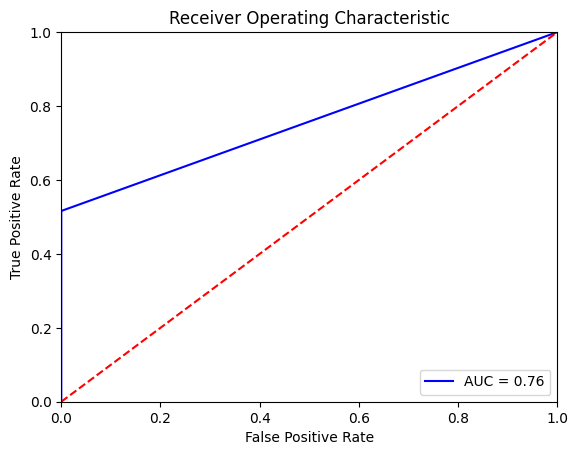

In [113]:
roc_curves(y_test,nb_y_pred)

### **PERCEPTRON LEARNING ALGORITHM**

In [56]:
# Build the Perceptron Model
class Perceptron:

	def __init__(self, num_inputs, learning_rate=0.01):
		# Initialize the weight and learning rate
		self.weights = np.random.rand(num_inputs + 1)
		self.learning_rate = learning_rate

	# Define the first linear layer
	def linear(self, inputs):
		Z = inputs @ self.weights[1:].T + + self.weights[0]
		return Z

	# Define the Heaviside Step function.
	def Heaviside_step_fn(self, z):
		if z >= 0:
			return 1
		else:
			return 0

	# Define the Prediction
	def predict(self, inputs):
		Z = self.linear(inputs)
		try:
			pred = []
			for z in Z:
				pred.append(self.Heaviside_step_fn(z))
		except:
			return self.Heaviside_step_fn(Z)
		return pred

	# Define the Loss function
	def loss(self, prediction, target):
		loss = (prediction-target)
		return loss

	#Define training
	def train(self, inputs, target):
		prediction = self.predict(inputs)
		error = self.loss(prediction, target)
		self.weights[1:] += self.learning_rate * error * inputs
		self.weights[0] += self.learning_rate * error

	# Fit the model
	def fit(self, X, y, num_epochs):
		for epoch in range(num_epochs):
			for inputs, target in zip(X, y):
				self.train(inputs, target)


In [116]:
perceptron = Perceptron(num_inputs=X_train.shape[1])
perceptron.fit(X_train, y_train, num_epochs=10)

In [117]:
pla_y_pred = pred = perceptron.predict(X_test)

The accuracy of the pla model is  0.41025641025641024


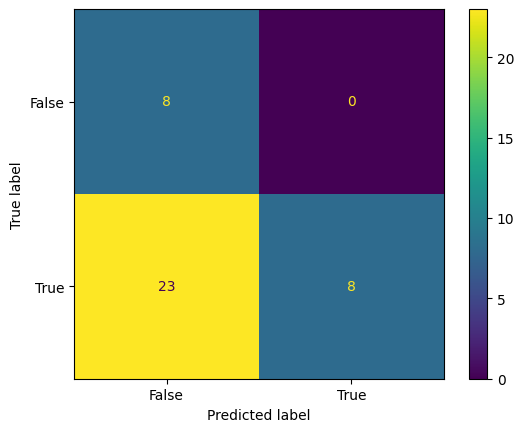

In [118]:
pla_accuracy = accuracy_score(y_test, pla_y_pred)
print("The accuracy of the pla model is ",pla_accuracy)
cm_display(y_test,pla_y_pred)


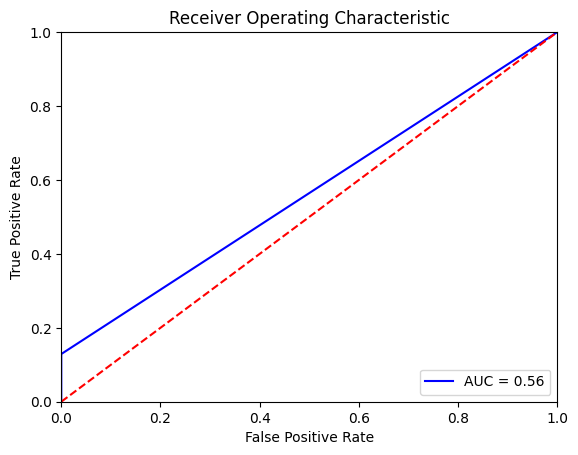

In [114]:
roc_curves(y_test,pla_y_pred)

### **MULTI LAYER PERCEPTRON**

In [70]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt

In [78]:
model = Sequential([


      # dense layer 1
    Dense(256, activation='sigmoid'),

    # dense layer 2
    Dense(128, activation='sigmoid'),

      # output layer
    Dense(10, activation='sigmoid'),
])

In [79]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [86]:
model.fit(X_train, y_train, epochs=10,
          validation_split=0.2)

Epoch 1/10
4/4 [==============================] - 0s 108ms/step - loss: 0.3043 - accuracy: 0.8387 - val_loss: 0.5316 - val_accuracy: 0.6875
Epoch 2/10
4/4 [==============================] - 0s 32ms/step - loss: 0.3063 - accuracy: 0.8629 - val_loss: 0.5174 - val_accuracy: 0.6875
Epoch 3/10
4/4 [==============================] - 0s 45ms/step - loss: 0.2990 - accuracy: 0.8468 - val_loss: 0.4964 - val_accuracy: 0.7500
Epoch 4/10
4/4 [==============================] - 0s 38ms/step - loss: 0.2951 - accuracy: 0.8468 - val_loss: 0.4815 - val_accuracy: 0.7812
Epoch 5/10
4/4 [==============================] - 0s 50ms/step - loss: 0.2914 - accuracy: 0.8548 - val_loss: 0.4794 - val_accuracy: 0.7812
Epoch 6/10
4/4 [==============================] - 0s 47ms/step - loss: 0.2871 - accuracy: 0.8548 - val_loss: 0.4871 - val_accuracy: 0.7500
Epoch 7/10
4/4 [==============================] - 0s 37ms/step - loss: 0.2843 - accuracy: 0.8468 - val_loss: 0.5080 - val_accuracy: 0.7188
Epoch 8/10
4/4 [==========

In [88]:
results = model.evaluate(x_test,  y_test, verbose = 0)
print('test loss, test acc:', results)

test loss, test acc: [0.704635739326477, 0.6410256624221802]


## **CLUSTERING**

In [140]:
model = KMeans(n_clusters=2)
y_pred = model.fit_predict(x)

wcss = model.inertia_
print("Within-Cluster Sum of Squares (WCSS):", wcss)
klabels = model.labels_
silhouette=silhouette_score(x,klabels)

print("Silhouette Score [More towards 1 indicates better working]",silhouette)

Within-Cluster Sum of Squares (WCSS): 1165833.2846424452
Silhouette Score [More towards 1 indicates better working] 0.7039673707442137


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### **RESULTS**

SUPPORT VECTOR MACHINE WAS FOUND TO BE THE SUITABLE ONE FOR ME

High Accuracy: An accuracy of 87.18% indicates that the SVM model correctly predicts the target variable (either 1 - PARKINSON AFFECTED or 0 - HEALTHY ) for approximately 87.18% of the samples in your dataset. High accuracy is generally desirable as it reflects the model's ability to make correct predictions.

AUC Score: The AUC score of 0.78 suggests that the SVM model has good discriminatory power. A higher AUC value indicates that the model is better at distinguishing between the positive and negative classes. An AUC of 0.78 is reasonably good and indicates that the SVM model performs well in terms of classifying the data points.